Data Set Name: Autistic Spectrum Disorder Screening Data for Adult  
Abstract: Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

Data Type: Multivariate OR Univariate OR Sequential OR Time-Series OR Text OR Domain-Theory

Nominal / categorical, binary and continuous 
Task: Classification
Attribute Type: Categorical, continuous and binary  
Area: Medical, health and social science
Format Type: Non-Matrix
Does your data set contain missing values? Yes
Number of Instances (records in your data set): 704
Number of Attributes (fields within each record): 21
Relevant Information: For Further information about the attributes/feature see below  table.


### Columns Description

A1_Score - A10_Score columns are questions whose answers are ('0', '1') <br>
age - number in years <br>
gender - female or male <br>
ethnicity - ('White-European', 'Latino', 'Others', 'Black', 'Asian', "'Middle Eastern '", 'Pasifika', "'South Asian'", <br> 'Hispanic', 'Turkish', 'others') <br>
jundice - ('no', 'yes') Whether the case was born with jaundice <br>
contry_of_res - Country of residence <br>
used_app_before - ('no', 'yes')  <br>
result - Result of the test  <br>
age_desc - Text description of age ("'18 and more'",) <br>
relation - Who is completing the test ('Self', 'Parent', "'Health care professional'", 'Relative', 'Others') <br>
Class/ASD - ('NO', 'YES') Whether the case has Autism Spectral Disorder  <br>
austim - ('no', 'yes')  Whether family member had autism <br>

In [1]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import unicodedata

In [2]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)

In [3]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Loading data from arff files
from scipy.io.arff import loadarff
Aut_data_raw = loadarff("attachment_Autism-Adult-Data_lyst6665.arff")

In [5]:
Aut_data_raw

(array([(b'1', b'1', b'1', b'1', b'0', b'0', b'1', b'1', b'0', b'0',  26., b'f', b'White-European', b'no', b'no', b"'United States'", b'no',  6., b"'18 and more'", b'Self', b'NO'),
        (b'1', b'1', b'0', b'1', b'0', b'0', b'0', b'1', b'0', b'1',  24., b'm', b'Latino', b'no', b'yes', b'Brazil', b'no',  5., b"'18 and more'", b'Self', b'NO'),
        (b'1', b'1', b'0', b'1', b'1', b'0', b'1', b'1', b'1', b'1',  27., b'm', b'Latino', b'yes', b'yes', b'Spain', b'no',  8., b"'18 and more'", b'Parent', b'YES'),
        (b'1', b'1', b'0', b'1', b'0', b'0', b'1', b'1', b'0', b'1',  35., b'f', b'White-European', b'no', b'yes', b"'United States'", b'no',  6., b"'18 and more'", b'Self', b'NO'),
        (b'1', b'0', b'0', b'0', b'0', b'0', b'0', b'1', b'0', b'0',  40., b'f', b'?', b'no', b'no', b'Egypt', b'no',  2., b"'18 and more'", b'?', b'NO'),
        (b'1', b'1', b'1', b'1', b'1', b'0', b'1', b'1', b'1', b'1',  36., b'm', b'Others', b'yes', b'no', b"'United States'", b'no',  9., b"'18 and 

In [6]:
Aut_data_raw_array = np.array(Aut_data_raw[0])

In [7]:
Aut_data_df = pd.DataFrame(Aut_data_raw_array)
Aut_data_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no',"b""'United States'""",b'no',6.0,"b""'18 and more'""",b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,"b""'18 and more'""",b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,"b""'18 and more'""",b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes',"b""'United States'""",b'no',6.0,"b""'18 and more'""",b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40.0,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,"b""'18 and more'""",b'?',b'NO'


In [8]:
Aut_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null object
A2_Score           704 non-null object
A3_Score           704 non-null object
A4_Score           704 non-null object
A5_Score           704 non-null object
A6_Score           704 non-null object
A7_Score           704 non-null object
A8_Score           704 non-null object
A9_Score           704 non-null object
A10_Score          704 non-null object
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), object(19)
memory usage: 115.6+ KB


In [9]:
Aut_data_df = Aut_data_df.select_dtypes(include=['object']).stack().str.decode("utf-8").unstack()

In [10]:
Aut_data_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,f,?,no,no,Egypt,no,'18 and more',?,NO


In [11]:
Aut_data_df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
699,0,1,0,1,1,0,1,1,1,1,f,White-European,no,no,Russia,no,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,m,Hispanic,no,no,Mexico,no,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,f,?,no,no,Russia,no,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,m,'South Asian',no,no,Pakistan,no,'18 and more',Self,NO
703,1,0,1,1,1,0,1,1,1,1,f,White-European,no,no,Cyprus,no,'18 and more',Self,YES


In [12]:
Aut_data_df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
count,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704
unique,2,2,2,2,2,2,2,2,2,2,2,12,2,2,67,2,1,6,2
top,1,0,0,0,0,0,0,1,0,1,m,White-European,no,no,'United States',no,'18 and more',Self,NO
freq,508,385,382,355,353,504,410,457,476,404,367,233,635,613,113,692,704,522,515


In [13]:
Aut_data_df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [14]:
Aut_data_df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [15]:
Aut_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 703
Data columns (total 19 columns):
A1_Score           704 non-null object
A2_Score           704 non-null object
A3_Score           704 non-null object
A4_Score           704 non-null object
A5_Score           704 non-null object
A6_Score           704 non-null object
A7_Score           704 non-null object
A8_Score           704 non-null object
A9_Score           704 non-null object
A10_Score          704 non-null object
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: object(19)
memory usage: 110.0+ KB


In [16]:
Aut_data_df.replace('?', '', inplace =True)

In [17]:
Aut_data_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation', 'Class/ASD'],
      dtype='object')

In [18]:
Aut_data_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,f,,no,no,Egypt,no,'18 and more',,NO


In [19]:
Aut_data_df['ethnicity'].value_counts()

White-European       233
Asian                123
                      95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [20]:
Aut_data_df['contry_of_res'][Aut_data_df['ethnicity']==np.nan]

Series([], Name: contry_of_res, dtype: object)

In [21]:
Aut_data_df['ethnicity']=='NaN'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
674    False
675    False
676    False
677    False
678    False
679    False
680    False
681    False
682    False
683    False
684    False
685    False
686    False
687    False
688    False
689    False
690    False
691    False
692    False
693    False
694    False
695    False
696    False
697    False
698    False
699    False
700    False
701    False
702    False
703    False
Name: ethnicity, Length: 704, dtype: bool

In [22]:
from  sklearn.preprocessing import LabelEncoder
encoding_list = ['gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation', 'Class/ASD']
Aut_data_df[encoding_list] = Aut_data_df[encoding_list].apply(LabelEncoder().fit_transform)

In [23]:
object_dt = Aut_data_df.select_dtypes(include='object').columns
Aut_data_df[object_dt] = Aut_data_df.select_dtypes(include='object').apply(pd.to_numeric)

In [24]:
Aut_data_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,0,10,0,0,10,0,0,5,0
1,1,1,0,1,0,0,0,1,0,1,1,6,0,1,25,0,0,5,0
2,1,1,0,1,1,0,1,1,1,1,1,6,1,1,61,0,0,3,1
3,1,1,0,1,0,0,1,1,0,1,0,10,0,1,10,0,0,5,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,32,0,0,0,0


In [25]:
# report = pandas_profiling.ProfileReport(Aut_data_df)
# report.to_file("Aut_data_dataframe.html")

In [26]:
# X = Aut_data_df.drop(['Class/ASD'], inplace = True, axis=1)
Aut_data_df.rename(columns={'Class/ASD': 'Class'}, inplace= True)

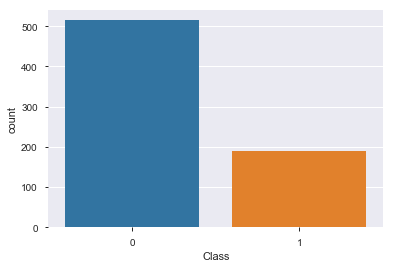

In [27]:
sns.countplot('Class', data = Aut_data_df)


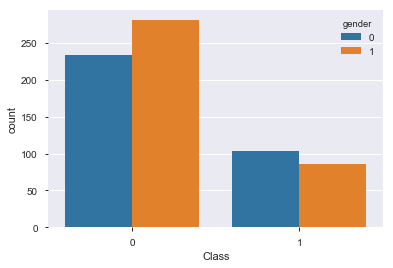

In [28]:
sns.countplot(x='Class',hue="gender",data=Aut_data_df)

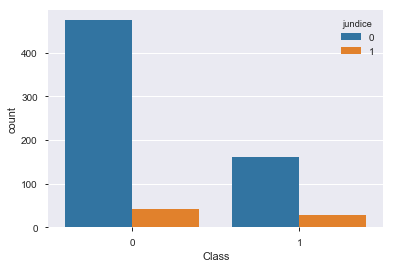

In [29]:
sns.countplot(x='Class',hue="jundice",data=Aut_data_df)

In [30]:
Aut_data_df_corr=Aut_data_df.corr()


<Figure size 1440x1440 with 0 Axes>

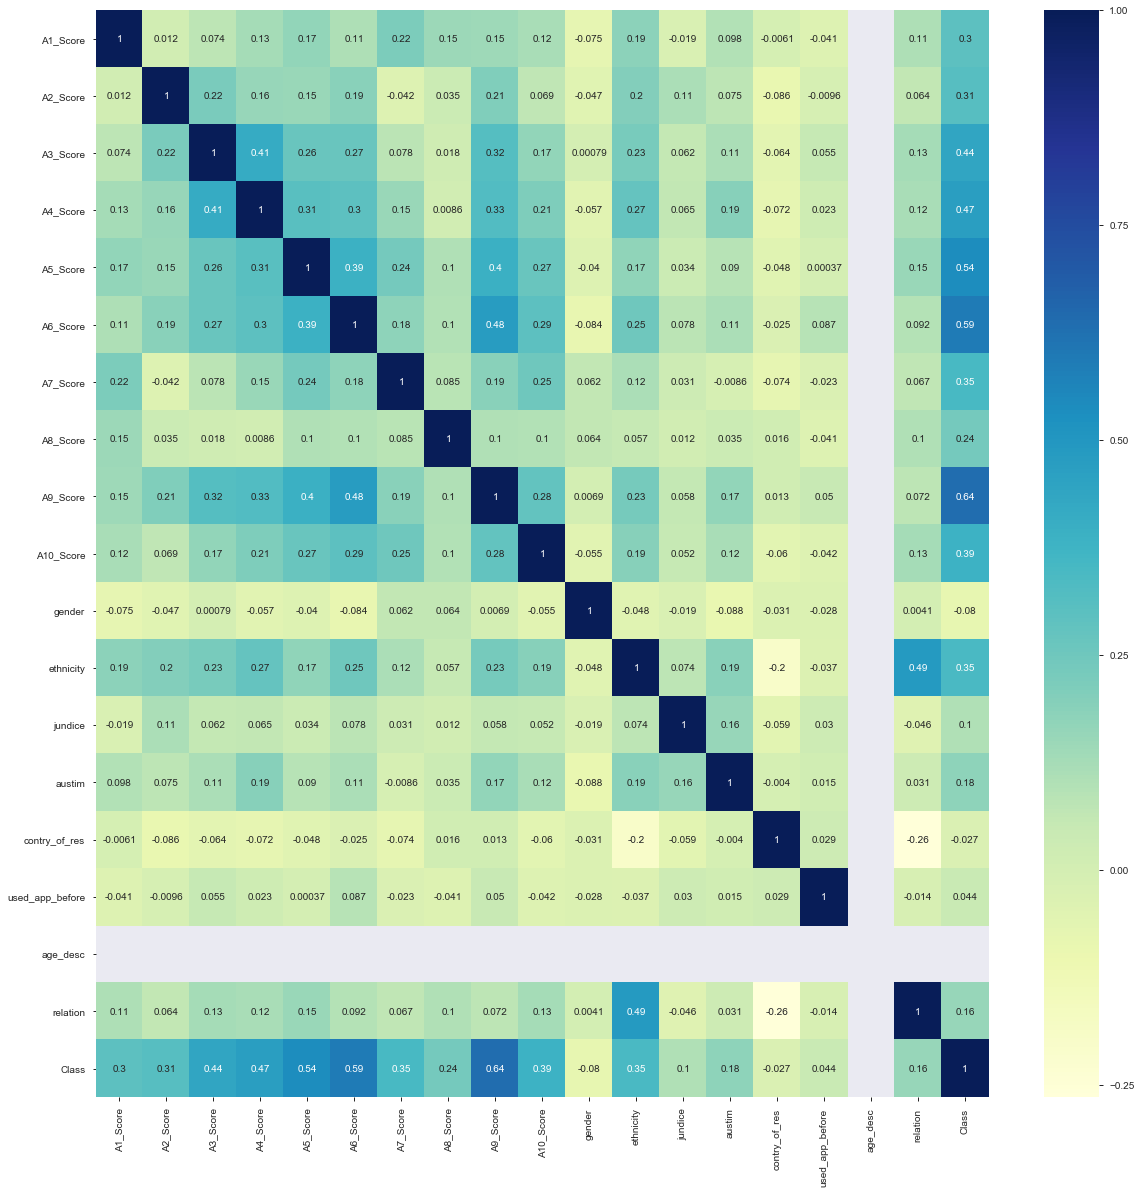

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(Aut_data_df_corr,annot=True, cmap="YlGnBu")

In [32]:
# custom designed function
def extract_x_columns(df_y):
    X = df_y[df_y.between(0.1,0.8)].index        
    X = X.append(df_y[df_y.between(-0.8,-0.1)].index)    
    return X

In [33]:
x_columns = extract_x_columns(Aut_data_df_corr['Class'])
x_columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'ethnicity', 'jundice',
       'austim', 'relation'],
      dtype='object')

In [34]:
Aut_data_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation', 'Class'],
      dtype='object')

In [35]:
Y = Aut_data_df['Class']
X = Aut_data_df.drop(['Class'], axis=1)


In [36]:
X.shape
Y.shape

(704, 18)

(704,)

In [37]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Aut_data_df_nor = scalar.fit_transform(Aut_data_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
Aut_data_df_nor

array([[ 0.62114956,  1.09858844,  1.08919025, ...,  0.        ,
         0.51640515, -0.60579724],
       [ 0.62114956,  1.09858844, -0.91811325, ...,  0.        ,
         0.51640515, -0.60579724],
       [ 0.62114956,  1.09858844, -0.91811325, ...,  0.        ,
        -0.63043783,  1.65071734],
       ...,
       [ 0.62114956, -0.91025899,  1.08919025, ...,  0.        ,
        -2.35070229,  1.65071734],
       [ 0.62114956, -0.91025899, -0.91811325, ...,  0.        ,
         0.51640515, -0.60579724],
       [ 0.62114956, -0.91025899,  1.08919025, ...,  0.        ,
         0.51640515,  1.65071734]])

In [39]:
# Train and test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=62)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(492, 18)

(212, 18)

(492,)

(212,)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
Knn_ =[3,5, 7, 9, 11, 13, 15, 17, 19]
for Knn_index in Knn_:
    KNN = KNeighborsClassifier(n_neighbors=Knn_index)
    KNN.fit(x_train, y_train)
    pred_y = KNN.predict(x_test)
    score_knn = cross_val_score(KNN, x_test, y_test, cv=5)
    print("cross val score :: " + str(score_knn))
    print("Mean cross val score :: " + str(round(score_knn.mean(), 4)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

cross val score :: [0.72727273 0.80952381 0.83333333 0.78571429 0.76190476]
Mean cross val score :: 0.7835


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

cross val score :: [0.77272727 0.85714286 0.80952381 0.88095238 0.83333333]
Mean cross val score :: 0.8307


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

cross val score :: [0.77272727 0.88095238 0.80952381 0.83333333 0.80952381]
Mean cross val score :: 0.8212


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

cross val score :: [0.77272727 0.88095238 0.80952381 0.83333333 0.78571429]
Mean cross val score :: 0.8165


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

cross val score :: [0.75       0.92857143 0.88095238 0.76190476 0.80952381]
Mean cross val score :: 0.8262


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

cross val score :: [0.70454545 0.85714286 0.83333333 0.80952381 0.80952381]
Mean cross val score :: 0.8028


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

cross val score :: [0.68181818 0.88095238 0.83333333 0.78571429 0.78571429]
Mean cross val score :: 0.7935


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

cross val score :: [0.63636364 0.85714286 0.85714286 0.80952381 0.80952381]
Mean cross val score :: 0.7939


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

cross val score :: [0.63636364 0.88095238 0.83333333 0.83333333 0.83333333]
Mean cross val score :: 0.8035


In [41]:

KNN = KNeighborsClassifier(n_neighbors=5)


In [42]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
pred_y = KNN.predict(x_test)

In [44]:

score_knn = cross_val_score(KNN, x_test, y_test, cv=5)
print("cross val score :: " + str(score_knn))
print("Mean cross val score :: " + str(round(score_knn.mean(), 4)))

cross val score :: [0.77272727 0.85714286 0.80952381 0.88095238 0.83333333]
Mean cross val score :: 0.8307


## after the feature elemination 

In [45]:
Y = Aut_data_df['Class']
X = Aut_data_df[x_columns]


In [46]:
X.shape
Y.shape

(704, 14)

(704,)

In [47]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Aut_data_df_nor = scalar.fit_transform(Aut_data_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
Aut_data_df_nor

array([[ 0.62114956,  1.09858844,  1.08919025, ...,  0.        ,
         0.51640515, -0.60579724],
       [ 0.62114956,  1.09858844, -0.91811325, ...,  0.        ,
         0.51640515, -0.60579724],
       [ 0.62114956,  1.09858844, -0.91811325, ...,  0.        ,
        -0.63043783,  1.65071734],
       ...,
       [ 0.62114956, -0.91025899,  1.08919025, ...,  0.        ,
        -2.35070229,  1.65071734],
       [ 0.62114956, -0.91025899, -0.91811325, ...,  0.        ,
         0.51640515, -0.60579724],
       [ 0.62114956, -0.91025899,  1.08919025, ...,  0.        ,
         0.51640515,  1.65071734]])

In [49]:
# Train and test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=62)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(492, 14)

(212, 14)

(492,)

(212,)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

mean_score=[]
acc_score = []
for Knn_index in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors=Knn_index)
    KNN.fit(x_train, y_train)
    pred_y = KNN.predict(x_test)
    score_knn = cross_val_score(KNN, x_test, y_test, cv=5)
    print("cross val score :: " + str(score_knn))
    print("Mean cross val score :: " + str(round(score_knn.mean(), 4)))
    print("Accuracy score :: " + str(round(metrics.accuracy_score(y_test, pred_y), 4)))
    mean_score.append(score_knn.mean())
    acc_score.append(metrics.accuracy_score(y_test, pred_y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

cross val score :: [0.88636364 0.80952381 0.97619048 0.9047619  0.88095238]
Mean cross val score :: 0.8916
Accuracy score :: 0.9104


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

cross val score :: [0.86363636 0.85714286 0.92857143 0.9047619  0.88095238]
Mean cross val score :: 0.887
Accuracy score :: 0.9198


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

cross val score :: [0.88636364 0.88095238 0.95238095 0.9047619  0.85714286]
Mean cross val score :: 0.8963
Accuracy score :: 0.934


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

cross val score :: [0.88636364 0.85714286 0.97619048 0.9047619  0.83333333]
Mean cross val score :: 0.8916
Accuracy score :: 0.934


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

cross val score :: [0.86363636 0.88095238 0.97619048 0.92857143 0.85714286]
Mean cross val score :: 0.9013
Accuracy score :: 0.9434


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

cross val score :: [0.84090909 0.88095238 0.95238095 0.95238095 0.80952381]
Mean cross val score :: 0.8872
Accuracy score :: 0.9387


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

cross val score :: [0.84090909 0.88095238 0.92857143 0.92857143 0.85714286]
Mean cross val score :: 0.8872
Accuracy score :: 0.9387


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

cross val score :: [0.86363636 0.9047619  0.95238095 0.95238095 0.80952381]
Mean cross val score :: 0.8965
Accuracy score :: 0.9245


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

cross val score :: [0.86363636 0.9047619  0.92857143 0.92857143 0.78571429]
Mean cross val score :: 0.8823
Accuracy score :: 0.9434


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

cross val score :: [0.88636364 0.9047619  0.95238095 0.9047619  0.80952381]
Mean cross val score :: 0.8916
Accuracy score :: 0.934


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

cross val score :: [0.84090909 0.92857143 0.92857143 0.88095238 0.78571429]
Mean cross val score :: 0.8729
Accuracy score :: 0.934


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

cross val score :: [0.84090909 0.92857143 0.92857143 0.85714286 0.78571429]
Mean cross val score :: 0.8682
Accuracy score :: 0.9292


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

cross val score :: [0.79545455 0.95238095 0.92857143 0.85714286 0.78571429]
Mean cross val score :: 0.8639
Accuracy score :: 0.9245


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

cross val score :: [0.79545455 0.9047619  0.9047619  0.83333333 0.78571429]
Mean cross val score :: 0.8448
Accuracy score :: 0.9198


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

cross val score :: [0.77272727 0.92857143 0.9047619  0.83333333 0.78571429]
Mean cross val score :: 0.845
Accuracy score :: 0.9198


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

cross val score :: [0.79545455 0.9047619  0.9047619  0.83333333 0.80952381]
Mean cross val score :: 0.8496
Accuracy score :: 0.9104


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

cross val score :: [0.81818182 0.9047619  0.9047619  0.83333333 0.80952381]
Mean cross val score :: 0.8541
Accuracy score :: 0.9198


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

cross val score :: [0.81818182 0.9047619  0.9047619  0.83333333 0.83333333]
Mean cross val score :: 0.8589
Accuracy score :: 0.9104


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

cross val score :: [0.79545455 0.9047619  0.92857143 0.83333333 0.83333333]
Mean cross val score :: 0.8591
Accuracy score :: 0.9198


In [51]:

KNN = KNeighborsClassifier(n_neighbors=5)

In [52]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
pred_y = KNN.predict(x_test)

In [54]:

score_knn = cross_val_score(KNN, x_test, y_test, cv=5)
print("cross val score :: " + str(score_knn))
print("Mean cross val score :: " + str(round(score_knn.mean(), 4)))

cross val score :: [0.86363636 0.88095238 0.97619048 0.92857143 0.85714286]
Mean cross val score :: 0.9013


In [55]:
metrics.accuracy_score(y_test, pred_y)

0.9433962264150944

<Figure size 720x720 with 0 Axes>

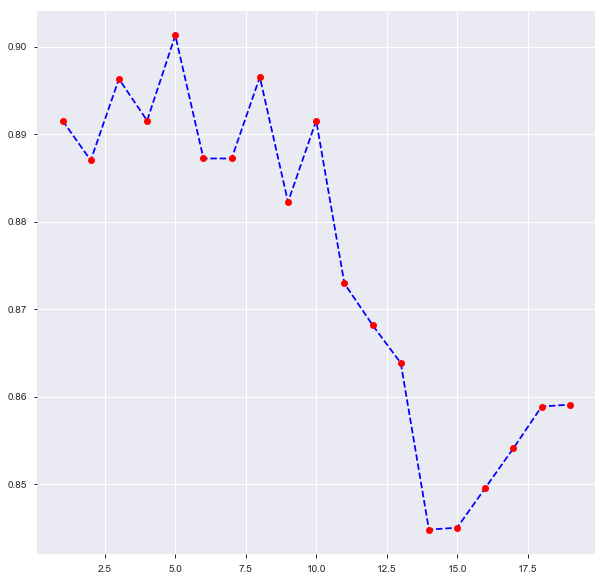

In [56]:
plt.figure(figsize=(10,10))
plt.plot(range(1,20), mean_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red')

<Figure size 720x720 with 0 Axes>

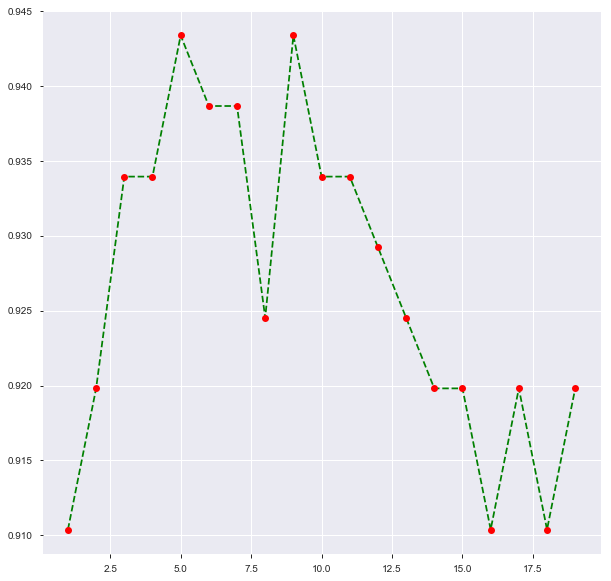

In [57]:
plt.figure(figsize=(10,10))
plt.plot(range(1,20), acc_score, color='green', linestyle='dashed', marker='o', markerfacecolor='red')

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix : ","\n")
print(confusion_matrix(y_test, pred_y))

Confusion Matrix :  

[[144   7]
 [  5  56]]


In [59]:
print("Classification Report : ","\n")
print(classification_report(y_test, pred_y))

Classification Report :  

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       151
           1       0.89      0.92      0.90        61

   micro avg       0.94      0.94      0.94       212
   macro avg       0.93      0.94      0.93       212
weighted avg       0.94      0.94      0.94       212

